Solution of the exercise about the pregnancy test.

In [1]:
from math import *
from pylab import *
from ct import *
%matplotlib inline 

I = 1.0e-2                        # mol/L
a = 100.0e-9                      # m
A = 1.0e-19                       # J
eta   = 0.001                     # Pa.s
n     = 4.45e15                   # /m^3
psi_s = 0.050 * elc/kT            # dimensionless potential  psi = Psi * e / kT
z     = 1.0                       # monovalent ions 

for psi_s in (-50.0e-3* elc/kT , -25.0e-3* elc/kT): 
    for I in (1.0e-4, 1.0e-3, 1.0e-2):

        print("\n--------------------------------------------")

        print("I=", I, "psi_s=", psi_s, "\n---------------------------")
        n0 = I*1000*Na
        print("n0 = ", n0, "molecules/m^3")
        lD = sqrt(eps*kT/(2*n0*elc**2))
        print("Screening length = ", lD)

        kappa = 1/lD
        print("kappa = ", kappa)
        ka = kappa*a
        print("ka = ", ka)

        # Derjaguin approximation for the electrostatic and vdW forces, valid if ka>>1 and h<<a
        F0_EL = eps*(kT/elc)**2*32*pi*ka*tanh(psi_s/4)**2
        F0_vdW = -A*a/12

        # Load the non-linear equation solver "fsolve"
        from scipy.optimize import fsolve
        # solve "sum of forces = 0"
        res = fsolve( lambda h: F0_EL*exp(-kappa*h) + F0_vdW/h**2, 2.0e-9 )
        # fsolve returns an array with 1 value. The following line is just to extract this value
        h = res[0]
        print("h =", h )

        # Define the potentials at the location of the max h 
        V_EL_max = eps*(kT/elc)**2*32*pi*a*tanh(psi_s/4)**2*exp(-kappa*h)
        V_vdW_max = -A*a/(12*h)
        Vmax = V_EL_max + V_vdW_max
        print("V max = ", Vmax/kT)

        # Compute the stability ratio 
        W = 1 / (2*kappa*a) * exp(Vmax/kT)
        print("W     =", W)

        # perikinetic aggregation constant for perfectly effective interactions 
        k = 8*kT/(3*eta)

        # real aggregation rate constant 
        if W>1:
            kstar = k/W 
        else:
            kstar = k

        # aggregation time 
        print("tau    =", 2/(kstar*n), 's' )
        
        # CCC from formula 
        gamma0 = tanh(psi_s/4.) 
        print(gamma0)
        CCC = 3.18e-36*gamma0**4/A**2/z**6 
        print("CCC =", CCC/1000, "mol/L") 


--------------------------------------------
I= 0.0001 psi_s= -1.9802911151247353 
---------------------------
n0 =  6.022141500000001e+22 molecules/m^3
Screening length =  3.006052077360499e-08
kappa =  33266223.414135337
ka =  3.3266223414135334
h = 5.708829531958749e-09
V max =  153.92261062712143
W     = 1.058539186416062e+66
tau    = 4.4101857373433076e+67 s
-0.45823334346911376
CCC = 0.014020834733017401 mol/L

--------------------------------------------
I= 0.001 psi_s= -1.9802911151247353 
---------------------------
n0 =  6.0221415e+23 molecules/m^3
Screening length =  9.505971329539855e-09
kappa =  105197035.14069045
ka =  10.519703514069045
h = 3.5117952269119617e-09
V max =  100.12408758736206
W     = 1.4464560730353327e+42
tau    = 6.026361635786144e+43 s
-0.45823334346911376
CCC = 0.014020834733017401 mol/L

--------------------------------------------
I= 0.01 psi_s= -1.9802911151247353 
---------------------------
n0 =  6.0221415e+24 molecules/m^3
Screening length =  3.

C:\Users\inest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


Now plot the potential to check if it's correct 

C:\Users\inest\AppData\Local\Temp\ipykernel_22920\3719933861.py:5: RuntimeWarning: divide by zero encountered in divide
  V_vdW = V_vdW_max = -A*a/(12*(r-2*a))


Text(0, 0.5, 'V/kT')

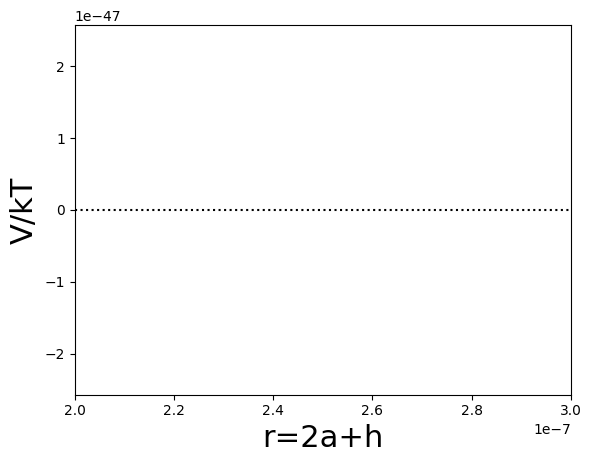

In [2]:
# Define a radial coordinate for the plot 
r = linspace(2*a,2*a+1.0e-7,1000)
# Define the potential 
V_EL = eps*(kT/elc)**2*32*pi*a*tanh(psi_s/4)**2*exp(-kappa*(r-2*a))
V_vdW = V_vdW_max = -A*a/(12*(r-2*a))
V = V_EL + V_vdW

# plot
figure()
plot(r,V/kT)
# plot a line showing Vmax and its location from the results above 
# If we were right above, the line should match the max of V(r)
plot([2*a+h,2*a+h],[0,Vmax/kT],'--k')
plot(r,r*0,':k')
xlim(2*a,max(r))
ylim(-abs(Vmax)/kT*1.2,abs(Vmax)/kT*1.2)
xlabel('r=2a+h',fontsize=22)
ylabel('V/kT',fontsize=22)



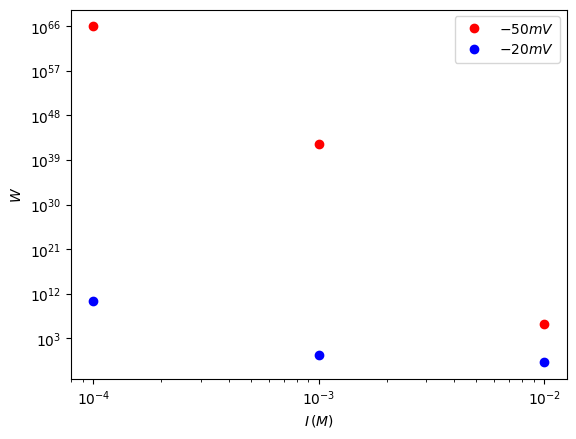

In [3]:
# Plot of the table 

I   = array([1.0e-4, 1.0e-3, 1.0e-2]) 
W50 = array([1.0e66, 1.4e42, 6.7e5])
W20 = array([3e10, 0.4, 0.015])

figure()
plot(I, W50, 'or', label='$-50mV$')
plot(I, W20, 'ob', label='$-20mV$')
xlabel('$I\\,(M)$')
ylabel('$W$')
legend()
xscale('log')
yscale('log')
savefig('pregW.png')
